In [1]:
import sys
 
sys.path.append('..')

from DataUtils import Data_Generator
from DataUtils import Data_Loader
from Models.InitialModel import InitialModel
from Models.ModelForNewDataSet import ModelNewDataset
from torch_geometric.loader import DataLoader

from Models import Evaluation


import torch
import matplotlib.pyplot as plt


In [2]:
PATH_INIT_DATASET_TRAIN = "../DataUtils/datasets/train_loader.pth"
PATH_INIT_DATASET_TEST = "../DataUtils/datasets/test_loader.pth"
PATH_NEW_DATASET_TRAIN = "../Dataset/NewDataset/LZchr1-train1.pt"
PATH_NEW_DATASET_TEST = "../Dataset/NewDataset/LZchr1-test1.pt"


In [8]:
import importlib
importlib.reload(Data_Generator)
importlib.reload(Data_Loader)
importlib.reload(ModelNewDataset)
importlib.reload(InitialModel)

<module 'Models.InitialModel.InitialModel' from '/home/aryan/Desktop/Researches/Darthmoth-GNN/cREgraph/cRE/SourceCode/../Models/InitialModel/InitialModel.py'>

In [6]:
data_loader = Data_Loader.InitialData()
cre_attributes, cre_dna, cre_edge_pairs, cre_edge_matrix = data_loader.load_graph_data("./../Dataset", "cre", '../DataUtils/config.json')  

tensor(153206)


In [7]:
Data_Generator.generate_datasets(cre_attributes, cre_dna, cre_edge_matrix,cre_edge_pairs)

100%|██████████| 1000/1000 [00:25<00:00, 39.26it/s]


+----------------------+-------------------------+----------------+----------+
| Layer                | Input Shape             | Output Shape   | #Param   |
|----------------------+-------------------------+----------------+----------|
| gnn_network          | [12800, 12800]          | [1280000, 2]   | 641,005  |
| ├─(conv1)GCNConv     | [12800, 500], [2, 4376] | [12800, 300]   | 150,300  |
| ├─(conv2)GCNConv     | [12800, 300], [2, 4376] | [12800, 200]   | 60,200   |
| ├─(linear)Linear     | [100, 100, 1]           | [100, 100, 2]  | 4        |
| ├─(bilinear)Bilinear | --                      | --             | 40,001   |
| ├─(transform1)Linear | [12800, 11]             | [12800, 500]   | 6,000    |
| ├─(transform2)Linear | [12800, 768]            | [12800, 500]   | 384,500  |
+----------------------+-------------------------+----------------+----------+
epoch 0, loss 5.7386674880981445
epoch 1, loss 6.239526271820068
epoch 2, loss 3.2109882831573486
epoch 3, loss 9.753453014127444e-

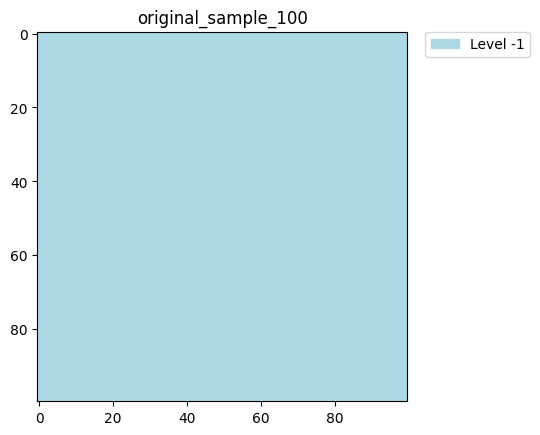

Plot section...


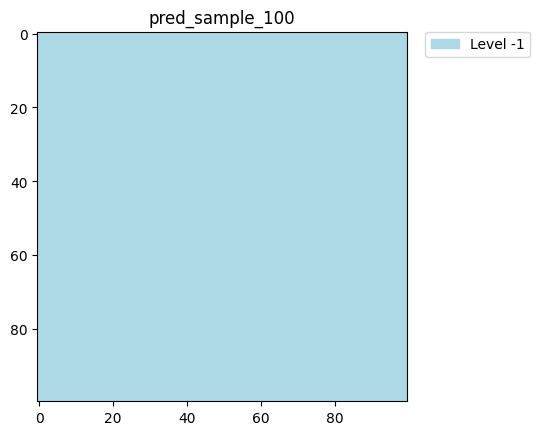

f1 score is:  0.4857142857142857


In [9]:
dataset_train_list = torch.load(PATH_INIT_DATASET_TRAIN)
dataset_test_list = torch.load(PATH_INIT_DATASET_TEST)
# dataset_train = DataLoader(dataset_test_selected_att, batch_size = config_json["batch_size"], shuffle=True)
# dataset_test2 = torch.load(PATH_INIT_DATASET_TEST)
model, losses_train, losses_test = InitialModel.train_gnn_model(dataset_train_list, dataset_train_list, "../Models/InitialModel/config.json")
y_true, y_pred = InitialModel.test_model(model, dataset_test_list, "../Models/InitialModel/config.json")

# loader = DataLoader(dataset_test_selected_att, batch_size = config_json["batch_size"], shuffle=True)

In [17]:
Evaluation.evaluate_result(y_true, y_pred)

True positive is:  28
False negative is:  1839774
New positive is:  0
New negative is:  0
False positive is:  0
True negative is:  160198
Precision(+) is:  1.0
Precision(-) is:  0.08010012140169963
Recall(+) is:  1.5219029004208062e-05
Recall(-) is:  1.0


In [12]:
def plot_losses(losses_train, losses_test):
  plt.plot(range(1, len(losses_train) + 1), losses_train, '-o')
  plt.plot(range(1, len(losses_test) + 1), losses_test, '-o', color='g')
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.show()

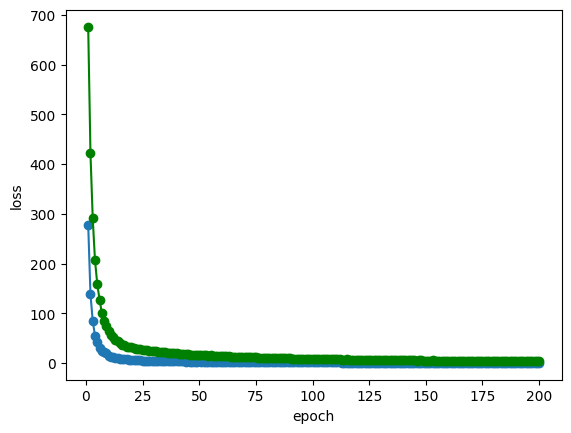

In [13]:
plot_losses(losses_train, losses_test)